In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
%matplotlib inline

In [51]:
## For torch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [ ]:
## For clustering
from numpy import array
from scipy.cluster.vq import kmeans2

In [112]:
def generate_data_2D(job=0, n_samples=10000,data_vis=0):
    if job == 0: # Gaussian mixtures 
        x1 = np.random.uniform(-1,1,size = n_samples)
        x2 = np.random.uniform(-1,1,size = n_samples)
        pi1 = ((mlab.bivariate_normal(x1, x2, 0.25, 0.25, -0.5, -0.2)+
               mlab.bivariate_normal(x1, x2, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)        
        p = np.zeros(n_samples)
        h = np.zeros(n_samples)
               
        for i in range(n_samples):
            rnd = np.random.uniform()
            if rnd > pi1[i]:
                p[i] = np.random.uniform()
                h[i] = 0
            else:
                p[i] = np.random.beta(a = 0.3, b = 4)
                h[i] = 1
        X = np.concatenate([[x1],[x2]]).T
        
        if data_vis == 1:
            fig = plt.figure()
            ax1 = fig.add_subplot(121)
            x_grid = np.arange(-1, 1, 1/100.0)
            y_grid = np.arange(-1, 1, 1/100.0)
            X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
            pi1_grid = ((mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, -0.5, -0.2)+
               mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)  
            ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
            ax2 = fig.add_subplot(122)
            alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
            nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
            ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
        return p, h, X
    if job == 1: # Linear trend
        pass
    if job == 2: # Gaussian mixture + linear trend
        pass
    
def BH(x, alpha = 0.05):
    x_s = sorted(x)
    n = len(x_s)
    ic = 0
    for i in range(n):
        if x_s[i] < i*alpha/float(n):
            ic = i
    return ic, x_s[ic]

def Storey_BH(x, alpha = 0.05, lamb=0.4):
    pi0_hat=np.divide(np.sum(x>lamb),x.shape[0] *(1-lamb))
    alpha /= pi0_hat
    x_s = sorted(x)
    n = len(x_s)
    ic = 0
    for i in range(n):
        if x_s[i] < i*alpha/float(n):
            ic = i
    return ic, x_s[ic], pi0_hat

Here I copied the result for different initialization methods: 

- BHq constant initialization

('Num of alternatives:', 2290.0)
('Num of discovery:', 1098.0)
('Num of true discovery:', 1058.0)
('Actual FDR:', 0.036429872495446269)

- Storey BHq constant initialization 

('Num of alternatives:', 2290.0)
('Num of discovery:', 1245.0)
('Num of true discovery:', 1204.0)
('Actual FDR:', 0.032931726907630576)

- K-cluster initialization




('Num of alt: ', 2229.0)
('True null prop: ', 0.77710000000000001)
('BH: num of dis, threshold:', 690, 0.0034309441033702911)
('SBH: num of dis, threshold, null esti', 769, 0.0048825931502571862, 0.77966666666666662)


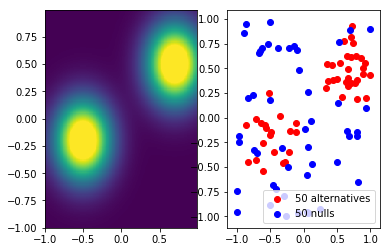

In [158]:
n_samples=10000
p, h, X = generate_data_2D(data_vis=1,n_samples=n_samples)
print("Num of alt: ", np.sum(h))
print("True null prop: ", 1-np.sum(h)/n_samples)
dic_BH, t_BH = BH(p)
print("BH: num of dis, threshold:", dic_BH,t_BH)
dic_SBH, t_SBH, pi0_SBH = Storey_BH(p)
print("SBH: num of dis, threshold, null esti", dic_SBH, t_SBH, pi0_SBH)

In [153]:
## Initialization
# BHq constant initialization 
# t_init = pBH * np.ones([n_samples, 1])

# Storey BHq constant initialization 
# t_init = pSBH * np.ones([n_samples, 1])

# K-clster initilization, Storey_BH for constant calculation
num_clusters=4
centroid, labels = kmeans2(X,num_clusters)
t_init=np.ones([n_samples,1])

for i in range(num_clusters):
    temp_p=p[labels==i]
    



# One-dim projection initialization

In [133]:
network = nn.Sequential(
        nn.Linear(2,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,10),
        nn.LeakyReLU(0.1),
        nn.Linear(10,1),
        nn.Sigmoid()
)

soft_compare = nn.Sigmoid()
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

for item in network.parameters():
    item.data.uniform_(-0.05, 0.05)

l1loss = nn.L1Loss()

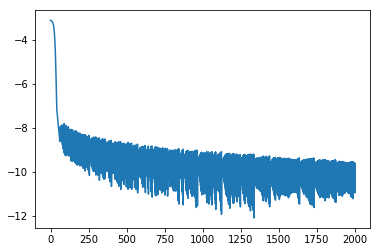

In [134]:
loss_hist = []
batch_size = 2000
pBH = BH(p)[1]
for iteration in range(2000):
    
    choice = np.random.choice(n_samples, batch_size)
    
    x_input = Variable(torch.from_numpy(X[choice,:].astype(np.float32).reshape(batch_size,2)))
    #p_input = Variable(torch.from_numpy(p[choice].astype(np.float32).reshape(batch_size,1)))
#     target = Variable(torch.from_numpy(pBH * np.ones((batch_size, 1))
#                                        .astype(np.float32).reshape(batch_size,1)))
    target = Variable(torch.from_numpy(t_init[choice,:]
                                       .astype(np.float32).reshape(batch_size,1)))
    
    optimizer.zero_grad()
    output = network.forward(x_input) * 0.1
    
    loss = l1loss(output, target)
    
    loss.backward()
    optimizer.step()
    loss_hist.append(loss.data[0])
plt.plot(np.log(loss_hist))

0
500
1000
1500
2000
2500
('s', Variable containing:
 0.1224
[torch.FloatTensor of size 1]
)
('s2', Variable containing:
1.00000e-03 *
  1.8604
[torch.FloatTensor of size 1]
)


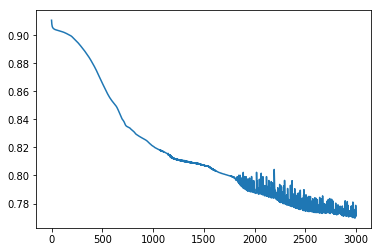

In [135]:
loss_hist = []
batch_size = 10000
for iteration in range(3000):
    if iteration % 500 == 0:
        print iteration
    choice = np.arange(batch_size)
    
    x_input = Variable(torch.from_numpy(X[choice,:].astype(np.float32).reshape(batch_size,2)))
    p_input = Variable(torch.from_numpy(p[choice].astype(np.float32).reshape(batch_size,1)))
    
    
    optimizer.zero_grad()
    output = network.forward(x_input) * 0.1
    s = torch.sum(soft_compare((output - p_input) * 1e3)) / batch_size
    s2 = torch.sum(soft_compare((p_input - (1-output)) * 1e3)) / batch_size
    
    gain = s  - 2 * soft_compare((s2 - s*0.05) * 50) 
    
    loss = -gain
    loss.backward()
    optimizer.step()
    loss_hist.append(loss.data[0])

plt.plot(loss_hist)
print('s',s)
print('s2', s2)

('Num of alternatives:', 2290.0)
('Num of discovery:', 1245.0)
('Num of true discovery:', 1204.0)
('Actual FDR:', 0.032931726907630576)
Learned rejection threshold:


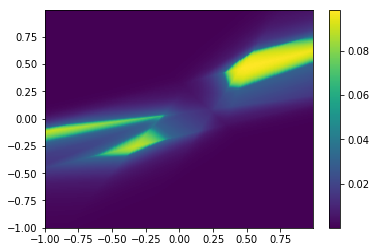

In [136]:
x_input = Variable(torch.from_numpy(X.astype(np.float32).reshape(n_samples ,2)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))

output = network.forward(x_input) * 0.1
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

print("Num of alternatives:",np.sum(h))
print("Num of discovery:",np.sum(pred))
print("Num of true discovery:",np.sum(pred * h))
print("Actual FDR:", 1-np.sum(pred * h) / np.sum(pred))

# Visuaizing the rejection threshold
x_grid = np.arange(-1, 1, 1/100.0)
y_grid = np.arange(-1, 1, 1/100.0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

x_in = Variable(torch.from_numpy(
    np.concatenate([[X_grid.flatten()], [Y_grid.flatten()]]).T.astype(np.float32)))
out = network(x_in)
z = out.data.numpy().reshape(X_grid.shape)

print('Learned rejection threshold:')
plt.figure()
plt.pcolor(X_grid, Y_grid, z*0.1)
plt.colorbar()